In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [14]:
dataset = pd.read_csv('pressao_sanguinea.csv')
dataset.shape
dataset.head()
dataset.describe()

,Dosagem_Droga,Pressao_Sanguinea
count,5.000000,5.000000
mean,4.000000,191.800000
std,1.581139,70.528009
min,2.000000,111.000000
25%,3.000000,132.000000
50%,4.000000,198.000000
75%,5.000000,240.000000
max,6.000000,278.000000


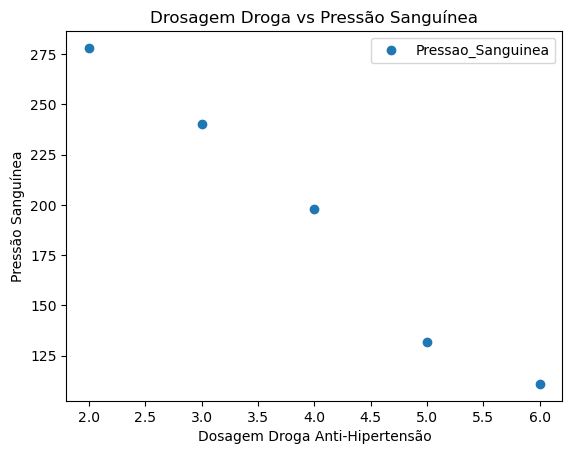

In [15]:
dataset.plot(x='Dosagem_Droga', y='Pressao_Sanguinea', style='o')
plt.title('Drosagem Droga vs Pressão Sanguínea')
plt.xlabel('Dosagem Droga Anti-Hipertensão')
plt.ylabel('Pressão Sanguínea')
plt.show()

In [20]:
from scipy.stats import pearsonr

print('Correlação: %0.5f' % pearsonr(dataset['Dosagem_Droga'], dataset['Pressao_Sanguinea'])[0])

Correlação: -0.99090


In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
print(regressor.intercept_)
print(regressor.coef_)

367.05
[-44.2]


In [26]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Esperado:': y_test, 'Previsto': y_pred})
df

,Esperado:,Previsto
0,198,190.25


In [28]:
from sklearn import metrics

print('MAE - Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - Root Mean Squared Error:', np.sqrt(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE - Mean Absolute Error: 183.9287527205297
MSE - Mean Squared Error: 33829.786077329765
RMSE - Root Mean Squared Error: [14.07124728]
R2: nan


/Users/bruno/miniconda3/envs/metal/lib/python3.9/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
